In [20]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy
import pandas as pd
total=read_csv('/content/_total4_p.csv')
#total.timestamp=pd.to_datetime(total.timestamp)

In [ ]:
total

,channel,start,stop,title,kategorija,descr,repriza,m_from_start,timestamp,d,h,m,date,broj_gledatelja,vrijeme,datum_ukupno,h_x,dow
0,HRT4 HD,2020-11-12 23:35:00,2020-11-13 00:00:00,Pogled preko granice - Hrvati u BiH (R),DRUGI INFORMATIVNI SADRŽAJI,NaN,da,25,2021-06-02 00:00:00,2,0,0,2020-11-13 00:00:00,397,2021-06-02 00:00:00,2020-11-13 00:00:00,0,4
1,HRT4 HD,2020-11-12 23:35:00,2020-11-13 00:00:00,Pogled preko granice - Hrvati u BiH (R),DRUGI INFORMATIVNI SADRŽAJI,NaN,da,26,2021-06-02 00:01:00,2,0,1,2020-11-13 00:01:00,405,2021-06-02 00:01:00,2020-11-13 00:01:00,0,4
2,HRT4 HD,2020-11-12 23:35:00,2020-11-13 00:00:00,Pogled preko granice - Hrvati u BiH (R),DRUGI INFORMATIVNI SADRŽAJI,NaN,da,27,2021-06-02 00:02:00,2,0,2,2020-11-13 00:02:00,395,2021-06-02 00:02:00,2020-11-13 00:02:00,0,4
3,HRT4 HD,2020-11-12 23:35:00,2020-11-13 00:00:00,Pogled preko granice - Hrvati u BiH (R),DRUGI INFORMATIVNI SADRŽAJI,NaN,da,28,2021-06-02 00:03:00,2,0,3,2020-11-13 00:03:00,368,2021-06-02 00:03:00,2020-11-13 00:03:00,0,4
4,HRT4 HD,2020-11-12 23:35:00,2020-11-13 00:00:00,Pogled preko granice - Hrvati u BiH (R),DRUGI INFORMATIVNI SADRŽAJI,NaN,da,29,2021-06-02 00:04:00,2,0,4,2020-11-13 00:04:00,356,2021-06-02 00:04:00,2020-11-13 00:04:00,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115373,HRT4 HD,2021-03-24 03:10:00,2021-03-24 04:00:00,Susret u dijalogu: Štovanje sv. Josipa u hrvat...,RELIGIJA,Štovanje sv. Josipa u hrvatskom narodu tema je...,ne,884,2021-06-02 17:54:00,2,17,54,2021-03-24 17:54:00,1318,2021-06-02 17:54:00,2021-03-24 17:54:00,17,2
115374,HRT4 HD,2021-03-24 03:10:00,2021-03-24 04:00:00,Susret u dijalogu: Štovanje sv. Josipa u hrvat...,RELIGIJA,Štovanje sv. Josipa u hrvatskom narodu tema je...,ne,885,2021-06-02 17:55:00,2,17,55,2021-03-24 17:55:00,1291,2021-06-02 17:55:00,2021-03-24 17:55:00,17,2
115375,HRT4 HD,2021-03-24 03:10:00,2021-03-24 04:00:00,Susret u dijalogu: Štovanje sv. Josipa u hrvat...,RELIGIJA,Štovanje sv. Josipa u hrvatskom narodu tema je...,ne,886,2021-06-02 17:56:00,2,17,56,2021-03-24 17:56:00,1236,2021-06-02 17:56:00,2021-03-24 17:56:00,17,2
115376,HRT4 HD,2021-03-24 03:10:00,2021-03-24 04:00:00,Susret u dijalogu: Štovanje sv. Josipa u hrvat...,RELIGIJA,Štovanje sv. Josipa u hrvatskom narodu tema je...,ne,887,2021-06-02 17:57:00,2,17,57,2021-03-24 17:57:00,1258,2021-06-02 17:57:00,2021-03-24 17:57:00,17,2


In [ ]:
total.groupby('kategorija')['broj_gledatelja'].agg(['mean','std'])


,mean,std
kategorija,,
DRUGI INFORMATIVNI SADRŽAJI,1017.960542,1044.866031
GLAZBA,910.982927,910.442855
OBRAZOVANJE,953.857604,777.446835
RELIGIJA,973.637591,881.238894
UMJETNOST I KULTURA,1003.475327,705.663516
VIJESTI,1021.681893,1079.335753
ZABAVA,799.841976,583.665916
ZNANOST,930.250421,694.263194


In [ ]:
#total[total['kategorija']=='IGRANI PROGRAM']['broj_gledatelja'].plot()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
plt.plot(total.date,total['broj_gledatelja'])
 

#LSTM simple


In [21]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

dataframe = total['broj_gledatelja']
dataset = dataframe.values.reshape(-1, 1)
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(look_back, activation="softmax"))
#model.add(LSTM(4, input_shape=(1, look_back)))#, input_shape=(1, look_back)))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/5
77272/77272 - 103s - loss: 3.9805e-04
Epoch 2/5
77272/77272 - 108s - loss: 2.5319e-04
Epoch 3/5
77272/77272 - 104s - loss: 2.5667e-04
Epoch 4/5
77272/77272 - 100s - loss: 2.2590e-04
Epoch 5/5
77272/77272 - 100s - loss: 2.1594e-04


In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 205.22 RMSE
Test Score: 142.02 RMSE


In [ ]:
testY

array([[ 553.99998708,  549.99999616,  579.00001049, ..., 1291.00003743,
        1236.00000196, 1258.00003218]])

In [22]:
from sklearn.metrics import r2_score
r2_score(testPredict, testY[0])

0.8485005747852145

In [ ]:
print(trainScore)
print(testScore)

146.7594984869057
81.63564919717142


In [6]:
testPredict

array([[296.14478],
       [307.91824],
       [290.68372],
       ...,
       [341.5497 ],
       [358.30746],
       [341.83966]], dtype=float32)

In [24]:
testpredict = testPredict.flatten()

In [25]:
df = pd.DataFrame({'Real Values':testY[0], 'Predicted Values':testpredict})
df

,Real Values,Predicted Values
0,553.999987,434.099731
1,549.999996,430.682159
2,579.000010,425.356323
3,601.999998,448.225403
4,602.999996,466.756470
...,...,...
38039,1301.000015,1026.119263
38040,1317.999976,1055.742310
38041,1291.000037,1065.759888
38042,1236.000002,1041.590698


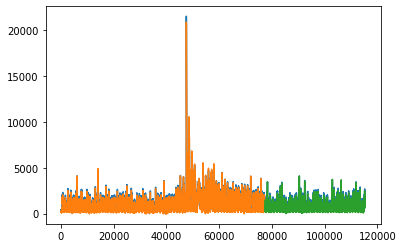

In [26]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':reg.predict(X_test)})
df

In [ ]:
trainX.shape

(30212, 1, 30)

##plot error

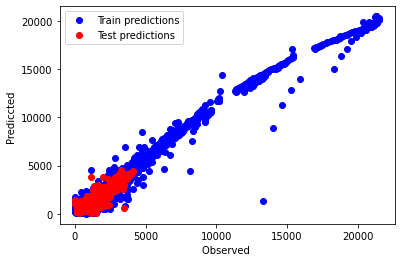

In [ ]:
#plt.scatter(testY.transpose() ,testPredict)


plt.plot( trainY.transpose() ,trainPredict,'bo',linestyle='none',label='Train predictions') 
plt.plot(testY.transpose() ,testPredict,'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed ')
plt.ylabel('Prediccted ' )
plt.legend()



In [ ]:
testY.shape

(1, 45098)

In [ ]:
dataset

array([[0.00086827],
       [0.05916646],
       [0.05891839],
       ...,
       [0.08546267],
       [0.08260978],
       [0.08112132]], dtype=float32)

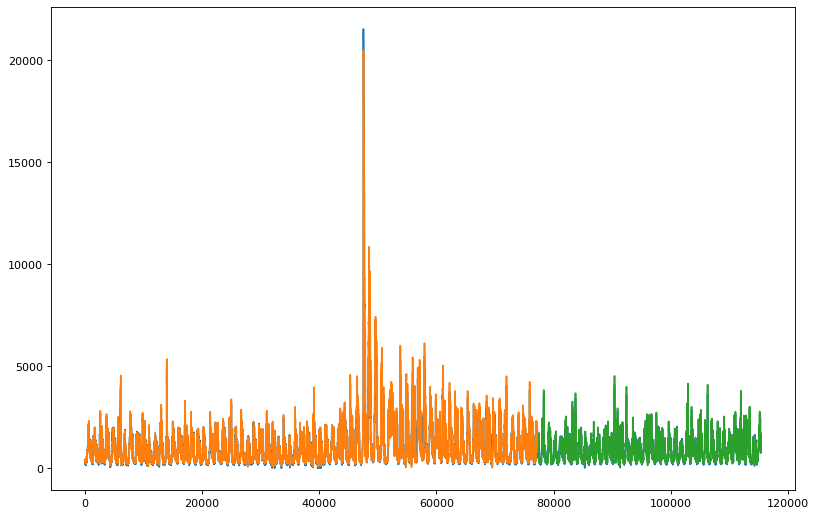

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
#fig.savefig('test2png.png', dpi=100)

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
scaler.inverse_transform(dataset)

array([[  8.],
       [478.],
       [476.],
       ...,
       [690.],
       [667.],
       [655.]], dtype=float32)

In [ ]:
model.save('/content/drive/MyDrive/Istraživanja/gledanost/20210512/model_30')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Istraživanja/gledanost/20210512/model_30/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Istraživanja/gledanost/20210512/model_30/assets


In [ ]:
#read
trainX 


array([[[0.00086827, 0.05916646, 0.05891839, ..., 0.03733565,
         0.03745969, 0.0368395 ]],

       [[0.05916646, 0.05891839, 0.05805011, ..., 0.03745969,
         0.0368395 , 0.03584719]],

       [[0.05891839, 0.05805011, 0.05631357, ..., 0.0368395 ,
         0.03584719, 0.00024808]],

       ...,

       [[0.03051352, 0.03225007, 0.03026544, ..., 0.02778467,
         0.02778467, 0.02790871]],

       [[0.03225007, 0.03026544, 0.0307616 , ..., 0.02778467,
         0.02790871, 0.02766063]],

       [[0.03026544, 0.0307616 , 0.03162987, ..., 0.02790871,
         0.02766063, 0.02927313]]], dtype=float32)

In [ ]:

from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
# load dataset
dataset=total
#dataset['repriza'] = dataset['repriza'].map({1: 'da', 0: 'ne' })

dataset = read_csv('/content/drive/MyDrive/Istraživanja/gledanost/20210512/total.csv')#read_csv('pollution.csv', header=0, index_col=0)
dataset = pd.get_dummies(dataset, columns=['kategorija'], prefix='', prefix_sep='')
dataset.columns

Index(['Unnamed: 0', 'channel', 'start', 'stop', 'title', 'descr', 'repriza',
       'm_from_start', 'timestamp', 'd_x', 'h_x', 'm_x', 'Unnamed: 0.1',
       'channel_name1', 'timestamp0', 'd_y', 'h_y', 'm_y', 'broj_gledatelja',
       'DRUGI INFORMATIVNI SADRŽAJI', 'GLAZBA', 'IGRANI PROGRAM',
       'OBRAZOVANJE', 'PROMOCIJA', 'RELIGIJA', 'UMJETNOST I KULTURA',
       'VIJESTI', 'ZABAVA', 'ZNANOST'],
      dtype='object')

In [ ]:
dataset['repriza']=dataset['repriza'].map({'da':1, 'ne':0 })
dataset['repriza']

0         0.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
136747    0.0
136748    0.0
136749    0.0
136750    0.0
136751    0.0
Name: repriza, Length: 136752, dtype: float64

#Lookback


In [ ]:
look_back=15
#dataset['zero']=[0 for i in dataset['broj_gledatelja']]
 
for i in range(1,look_back+1):
  dataset['increment'+str(i)]=dataset['broj_gledatelja'].shift(periods=(i))
 
dataset.columns

IndexError: ignored

In [ ]:
# # prepare data for lstm

# # convert series to supervised learning
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# 	n_vars = 1 if type(data) is list else data.shape[1]
# 	df = DataFrame(data)
# 	cols, names = list(), list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 		if i == 0:
# 			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
# 		else:
# 			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# 	# put it all together
# 	agg = concat(cols, axis=1)
# 	agg.columns = names
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg

# # load dataset

# #dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# # integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')
# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# # frame as supervised learning
# reframed = series_to_supervised(scaled, 1, 1)
# # drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(reframed.head())

In [ ]:

# values = reframed.values
# n_train_hours = 30 * 24*60
# train = values[:n_train_hours, :]
# test = values[n_train_hours:, :]
# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
# train

In [ ]:
 
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# history = model.fit(train_X, train_y, epochs=10, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

In [ ]:
# # make a prediction

# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

In [ ]:
dataset.dropna(inplace=True)
#51468.000000
dataset=dataset[dataset['broj_gledatelja']>5]
#	50884
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,channel,start,stop,title,descr,repriza,m_from_start,timestamp,d_x,h_x,m_x,Unnamed: 0.1,channel_name1,timestamp0,d_y,h_y,m_y,broj_gledatelja,DRUGI INFORMATIVNI SADRŽAJI,GLAZBA,IGRANI PROGRAM,OBRAZOVANJE,PROMOCIJA,RELIGIJA,UMJETNOST I KULTURA,VIJESTI,ZABAVA,ZNANOST,increment1,increment2,increment3,increment4,increment5,increment6,increment7,increment8,increment9,increment10,increment11,increment12,increment13,increment14,increment15
77,77,HRT3 HD,2021-02-01 01:15:00,2021-02-01 02:45:00,"Kraljević i prosjak, američki film (89:37) (R)",Komedija/ drama snimljena prema klasičnoj prič...,1.0,0.0,2021-02-01 01:16:00,2021-02-01,1.0,16.0,165,hrt3,"February 01 2021, 01:16",2021-02-01,1,16,224,0,0,1,0,0,0,0,0,0,0,4.0,234.0,232.0,229.0,236.0,241.0,236.0,256.0,254.0,248.0,250.0,248.0,255.0,248.0,256.0
78,78,HRT3 HD,2021-02-01 01:15:00,2021-02-01 02:45:00,"Kraljević i prosjak, američki film (89:37) (R)",Komedija/ drama snimljena prema klasičnoj prič...,1.0,1.0,2021-02-01 01:17:00,2021-02-01,1.0,17.0,166,hrt3,"February 01 2021, 01:17",2021-02-01,1,17,229,0,0,1,0,0,0,0,0,0,0,224.0,4.0,234.0,232.0,229.0,236.0,241.0,236.0,256.0,254.0,248.0,250.0,248.0,255.0,248.0
79,79,HRT3 HD,2021-02-01 01:15:00,2021-02-01 02:45:00,"Kraljević i prosjak, američki film (89:37) (R)",Komedija/ drama snimljena prema klasičnoj prič...,1.0,2.0,2021-02-01 01:18:00,2021-02-01,1.0,18.0,168,hrt3,"February 01 2021, 01:18",2021-02-01,1,18,230,0,0,1,0,0,0,0,0,0,0,229.0,224.0,4.0,234.0,232.0,229.0,236.0,241.0,236.0,256.0,254.0,248.0,250.0,248.0,255.0
80,80,HRT3 HD,2021-02-01 01:15:00,2021-02-01 02:45:00,"Kraljević i prosjak, američki film (89:37) (R)",Komedija/ drama snimljena prema klasičnoj prič...,1.0,3.0,2021-02-01 01:19:00,2021-02-01,1.0,19.0,170,hrt3,"February 01 2021, 01:19",2021-02-01,1,19,231,0,0,1,0,0,0,0,0,0,0,230.0,229.0,224.0,4.0,234.0,232.0,229.0,236.0,241.0,236.0,256.0,254.0,248.0,250.0,248.0
81,81,HRT3 HD,2021-02-01 01:15:00,2021-02-01 02:45:00,"Kraljević i prosjak, američki film (89:37) (R)",Komedija/ drama snimljena prema klasičnoj prič...,1.0,4.0,2021-02-01 01:20:00,2021-02-01,1.0,20.0,173,hrt3,"February 01 2021, 01:20",2021-02-01,1,20,236,0,0,1,0,0,0,0,0,0,0,231.0,230.0,229.0,224.0,4.0,234.0,232.0,229.0,236.0,241.0,236.0,256.0,254.0,248.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136747,136747,HRT3 HD,2020-11-30 23:50:00,2020-01-12 00:45:00,Točka na A - suvremena hrvatska arhitektura (1...,Upoznajte tri arhitektonska djela nominirana z...,0.0,4.0,2020-11-30 23:55:00,2020-11-30,23.0,55.0,294477,hrt3,"November 30 2020, 23:55",2020-11-30,23,55,661,0,0,0,0,0,0,1,0,0,0,686.0,678.0,649.0,609.0,645.0,616.0,661.0,693.0,702.0,706.0,741.0,767.0,816.0,885.0,972.0
136748,136748,HRT3 HD,2020-11-30 23:50:00,2020-01-12 00:45:00,Točka na A - suvremena hrvatska arhitektura (1...,Upoznajte tri arhitektonska djela nominirana z...,0.0,5.0,2020-11-30 23:56:00,2020-11-30,23.0,56.0,294478,hrt3,"November 30 2020, 23:56",2020-11-30,23,56,692,0,0,0,0,0,0,1,0,0,0,661.0,686.0,678.0,649.0,609.0,645.0,616.0,661.0,693.0,702.0,706.0,741.0,767.0,816.0,885.0
136749,136749,HRT3 HD,2020-11-30 23:50:00,2020-01-12 00:45:00,Točka na A - suvremena hrvatska arhitektura (1...,Upoznajte tri arhitektonska djela nominirana z...,0.0,6.0,2020-11-30 23:57:00,2020-11-30,23.0,57.0,294480,hrt3,"November 30 2020, 23:57",2020-11-30,23,57,690,0,0,0,0,0,0,1,0,0,0,692.0,661.0,686.0,678.0,649.0,609.0,645.0,616.0,661.0,693.0,702.0,706.0,741.0,767.0,816.0
136750,136750,HRT3 HD,2020-11-30 23:50:00,2020-01-12 00:45:00,Točka na A - suvremena hrvatska arhitektura (1...,Upoznajte tri arhitektonska djela nominirana z...,0.0,7.0,2020-11-30 23:58:00,2020-11-30,23.0,58.0,294482,hrt3,"November 30 2020, 23:58",2020-11-30,23,58,667,0,0,0,0,0,0,1,0,0,0,690.0,692.0,661.0,686.0,678.0,649.0,609.0,645.0,616.0,661.0,693.0,702.0,706.0,741.0,767.0


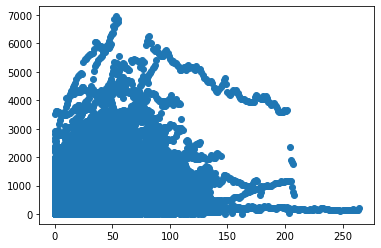

In [ ]:
import matplotlib.pyplot as plt

x = dataset.m_from_start
y = dataset.broj_gledatelja

plt.scatter(x, y)
plt.show()

In [ ]:
import pandas as pd 
dataset = read_csv('/content/_total3.csv')#read_csv('pollution.csv', header=0, index_col=0)
dataset = pd.get_dummies(dataset, columns=['kategorija'], prefix='', prefix_sep='')
dataset.columns
dataset.dropna(inplace=True)
#51468.000000
#dataset=dataset[dataset['broj_gledatelja']>100]
dataset['repriza']=dataset['repriza'].map({'da':1, 'ne':0 })
look_back=15
#dataset['zero']=[0 for i in dataset['broj_gledatelja']]
 
for i in range(1,look_back+1):
  dataset['increment'+str(i)]=dataset['broj_gledatelja'].shift(periods=(i))
 
cols=[ 'channel', 'start', 'stop', 'title', 'descr', 'repriza',
       'm_from_start', 'date', 'd_x',
       'channel', 'broj_gledatelja',
       'DRUGI INFORMATIVNI SADRŽAJI', 'GLAZBA', 'IGRANI PROGRAM',
       'OBRAZOVANJE', 'PROMOCIJA', 'RELIGIJA', 'UMJETNOST I KULTURA',
       'VIJESTI', 'ZABAVA', 'ZNANOST',# 'increment1', 'increment2',
  #     'increment3', 'increment4', 'increment5', 'increment6', 'increment7',
   #    'increment8', 'increment9', 'increment10', 'increment11', 'increment12',
    #   'increment13', 'increment14',
     'increment15']
dataset.date=pd.to_datetime(dataset.date)
dataset['dow']=dataset.date.dt.dayofweek

In [ ]:
 
#dataset['pred']=pred
dataset.columns

Index(['channel', 'title', 'descr', 'repriza', 'start', 'stop', 'date',
       'broj_gledatelja', 'vrijeme', 'datum_ukupno',
       'DRUGI INFORMATIVNI SADRŽAJI', 'GLAZBA', 'IGRANI PROGRAM',
       'OBRAZOVANJE', 'PROMOCIJA', 'RELIGIJA', 'UMJETNOST I KULTURA',
       'VIJESTI', 'ZABAVA', 'ZNANOST', 'increment1', 'increment2',
       'increment3', 'increment4', 'increment5', 'increment6', 'increment7',
       'increment8', 'increment9', 'increment10', 'increment11', 'increment12',
       'increment13', 'increment14', 'increment15', 'dow'],
      dtype='object')

,repriza,broj_gledatelja,DRUGI INFORMATIVNI SADRŽAJI,GLAZBA,IGRANI PROGRAM,OBRAZOVANJE,PROMOCIJA,RELIGIJA,UMJETNOST I KULTURA,VIJESTI,ZABAVA,ZNANOST,increment1,increment2,increment3,increment4,increment5,increment6,increment7,increment8,increment9,increment10,increment11,increment12,increment13,increment14,increment15,dow
count,32960.000000,32960.000000,32960.000000,32960.000000,32960.000000,32960.000000,32960.0,32960.000000,32960.000000,32960.000000,32960.000000,32960.000000,32959.000000,32958.000000,32957.000000,32956.000000,32955.000000,32954.000000,32953.000000,32952.000000,32951.000000,32950.000000,32949.000000,32948.000000,32947.000000,32946.000000,32945.000000,32960.000000
mean,0.581007,665.783404,0.033252,0.079157,0.429339,0.156098,0.0,0.010407,0.218174,0.004126,0.007555,0.061893,665.796778,665.810516,665.824104,665.837207,665.850827,665.865145,665.880072,665.893208,665.906528,665.920061,665.934444,665.949011,665.963305,665.976871,665.990226,2.971996
std,0.493402,777.778299,0.179298,0.269987,0.494989,0.362954,0.0,0.101482,0.413012,0.064104,0.086590,0.240965,777.786309,777.794110,777.801998,777.810162,777.818033,777.825492,777.832575,777.840722,777.848767,777.856692,777.864114,777.871425,777.878903,777.886811,777.894840,2.012108
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,0.000000,217.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,1.000000
50%,1.000000,376.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,3.000000
75%,1.000000,788.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,5.000000
max,1.000000,7326.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,6.000000


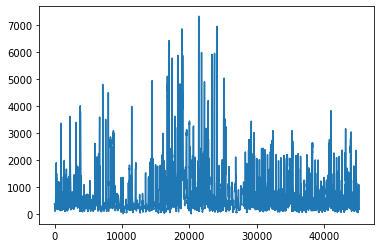

In [ ]:
#dataset['dif']=dataset['broj_gledatelja']-dataset['pred']
dataset['increment1'].plot()
dataset.describe()

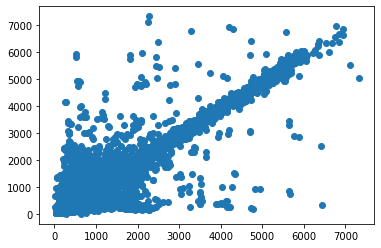

In [ ]:
import matplotlib.pyplot as plt

x = dataset.broj_gledatelja
y = dataset.increment2

plt.scatter(x, y)
plt.show()

In [ ]:
dataset.columns
 

bcols=[  'repriza',  'm_from_start', 'dow',
       'DRUGI INFORMATIVNI SADRŽAJI', 'GLAZBA', 'IGRANI PROGRAM',
       'OBRAZOVANJE', 'PROMOCIJA', 'RELIGIJA', 'UMJETNOST I KULTURA',
       'VIJESTI', 'ZABAVA', 'ZNANOST', 
       #'increment1', 'increment2', 'increment3', 'increment4' , 'increment5', 'increment6', 'increment7',
       #'increment8', 'increment9', 'increment10', 'increment11', 'increment12',
       #'increment13', 'increment14', 
       'increment15']
chlcol='broj_gledatelja'



In [ ]:
from sklearn.model_selection import train_test_split
import math
dataset2=dataset.dropna()
training_inputs=dataset2[bcols] 
training_outputs=dataset2[chlcol] 
#training_outputs_bin=[int(v) for v in training_outputs]
#add logs of bands
#import math
# for b in bcols:
#   training_inputs['log'+b]=training_inputs[b].apply(math.log)
# for b in bcols:
#   training_inputs['inv'+b]=training_inputs[b].apply(lambda x: 1/x)
# for b in bcols:
#   training_inputs['sq'+b]=training_inputs[b].apply(lambda x: x*x)
# for b in bcols:
#   training_inputs['exp'+b]=training_inputs[b].apply(math.exp  )
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')
# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# training_inputs_scaled = scaler.fit_transform(training_inputs)
X_train, X_test, y_train, y_test = train_test_split(training_inputs , training_outputs ,test_size=0.4 ,shuffle=True)
 

KeyError: ignored

In [ ]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(activation='relu', solver='adam', learning_rate = 'adaptive', shuffle=True,
                    max_iter=1000,
                   alpha=1e-5, hidden_layer_sizes= tuple(100 for _ in range(4)))
#ann.max_iter=1000
ann.fit(X_train, y_train)     
print('Train score',ann.score(X_train, y_train)    )
print('Test score',ann.score(X_test, y_test)    )   

Train score 0.9073565192432529
Test score 0.8602870884813836


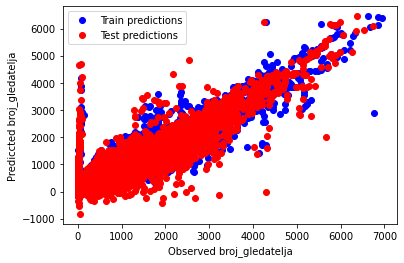

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.plot( y_train,ann.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,ann.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Prediccted ' + chlcol)
plt.legend()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
reg = LinearRegression( fit_intercept=True, normalize=True)
reg.fit(X_train, y_train)
 
#print(X_train.columns)
print(reg.coef_)

print(reg.intercept_)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

[ 1.82709559e+01  1.45117335e+00  8.55137742e+00  5.89229989e-01
 -5.24956093e+14 -5.24956093e+14 -5.24956093e+14 -5.24956093e+14
 -2.49793037e+14 -5.24956093e+14 -5.24956093e+14 -5.24956093e+14
 -5.24956093e+14 -5.24956093e+14  7.95093812e-01]
524956092719976.2
train score 0.7706904118498015
test score 0.7697107515096908


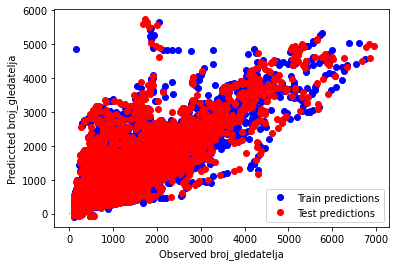

In [ ]:
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Prediccted ' + chlcol)
plt.legend()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

train score 0.9999503024332055
test score 0.9012995469960203


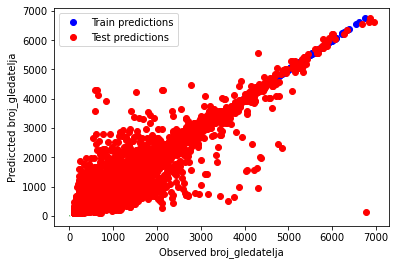

In [ ]:
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Prediccted ' + chlcol)
plt.legend()

In [ ]:
X_test

,repriza,m_from_start,h_x,m_x,DRUGI INFORMATIVNI SADRŽAJI,GLAZBA,IGRANI PROGRAM,OBRAZOVANJE,PROMOCIJA,RELIGIJA,UMJETNOST I KULTURA,VIJESTI,ZABAVA,ZNANOST,increment15
4045,0,9.0,19.0,25.0,0,0,0,0,0,0,1,0,0,0,1276.0
16638,0,43.0,7.0,54.0,0,0,0,1,0,0,0,0,0,0,1368.0
133093,1,58.0,11.0,1.0,0,0,1,0,0,0,0,0,0,0,746.0
112792,0,24.0,8.0,40.0,1,0,0,0,0,0,0,0,0,0,901.0
59250,0,25.0,22.0,26.0,0,0,1,0,0,0,0,0,0,0,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25819,1,35.0,16.0,54.0,0,0,0,0,0,0,1,0,0,0,1044.0
40963,1,11.0,5.0,32.0,0,0,1,0,0,0,0,0,0,0,446.0
41105,0,68.0,7.0,54.0,0,0,1,0,0,0,0,0,0,0,502.0
82499,1,22.0,7.0,33.0,0,0,0,1,0,0,0,0,0,0,369.0


In [ ]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

train score 0.7706893887104314
test score 0.7697200073814232


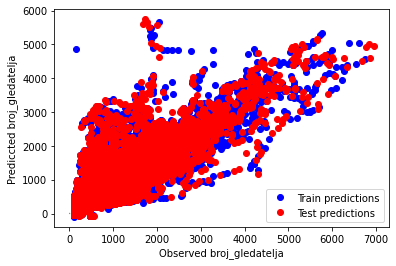

In [ ]:
plt.plot( y_train,reg.predict(X_train),'bo',linestyle='none',label='Train predictions') 
plt.plot(y_test,reg.predict(X_test),'ro',linestyle='none',label='Test predictions') 
plt.plot(range(12),range(12),'g',linestyle='dotted') 
plt.xlabel('Observed '+chlcol)
plt.ylabel('Prediccted ' + chlcol)
plt.legend()

In [ ]:
from sklearn.linear_model import Ridge
#reg = Ridge(alpha=0.2,normalize=True,solver='auto',fit_intercept=True)
reg = Ridge(alpha=.00000010,normalize=True,solver='svd',fit_intercept=True)

reg.fit(X_train, y_train)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

train score 0.770690685510801
test score 0.7697130911906924


In [ ]:
from sklearn.linear_model import ElasticNet
#from sklearn.datasets import make_regression
#X, y = make_regression(n_features=2, random_state=0)
#n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=Non
reg = ElasticNet(random_state=1,normalize=True)
reg.fit(X_train, y_train)

print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))

train score 0.00010658731031143454
test score 0.00010507407826376713


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(max_iter=1000)#,hidden_layer_sizes= tuple(10 for _ in range(4)))

param_list = {"activation": ["identity", "logistic", "tanh", "relu"], "solver": [ "adam"], "alpha": [0.00005,0.05]}

param_list = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,100,100)],
    'activation': ['identity',  'relu'],
    'solver': [ 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

gridCV = GridSearchCV(estimator=mlpr, param_grid=param_list,verbose=3)
#"hidden_layer_sizes": [(1,),(50,)], "lbfgs", 
#splits = TimeSeriesSplit(n_splits=3)

#pyplot.figure(1)
#index = 1
 
gridCV.fit(X_train, y_train)
predicted = gridCV.predict(X_test)
parameters = mlpr.get_params()
test_mse = mean_squared_error(y_test, predicted)
print(parameters)
print(test_mse)
sorted(gridCV.cv_results_.keys())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam, score=0.736, total=  19.4s
[CV] activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s remaining:    0.0s


[CV]  activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam, score=0.777, total=  15.5s
[CV] activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.9s remaining:    0.0s


[CV]  activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam, score=0.764, total=  22.1s
[CV] activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam 
[CV]  activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam, score=0.767, total=  20.6s
[CV] activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam 
[CV]  activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam, score=0.749, total=  10.9s
[CV] activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam 
[CV]  activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam, score=0.741, total=  25.1s
[CV] activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam 
[CV]  ac

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 110.5min finished


{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
63815.349053529695


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_activation',
 'param_alpha',
 'param_hidden_layer_sizes',
 'param_learning_rate',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
#predicted = gridCV.predict(X_test)
parameters = mlpr.get_params()
test_mse = mean_squared_error(y_test, predicted)
print(parameters)
print(test_mse)
sorted(gridCV.cv_results_.keys())
mlpr.fit(X_train,y_train)
print(mlpr.score(X_test,y_test))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
63815.349053529695
0.8718517824526519



{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 10, 10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
40618.0693256819
['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_activation',
 'param_alpha',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']




 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
63815.349053529695
['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_activation',
 'param_alpha',
 'param_hidden_layer_sizes',
 'param_learning_rate',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
print("train score",reg.score(X_train,y_train))
print("test score",reg.score(X_test,y_test))


train score 0.6989952225525036
test score 0.6908902632608829


KERAS


In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

 
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
for i in range(10):
  model.add(Dense(100, activation='relu'))
 
 
 
model.add(Dense(1, activation='sigmoid'))
# model.add(LSTM(4, input_shape=(1, X_train.shape[0])))#look_back)))
# model.add(Dropout(0.2))
# #model.add(Dense(units=output_labels))
# model.add(Dense(4, activation="relu"))
# #odel.add(LSTM(4))#, input_shape=(1,50)))
# #model.add(Dropout(0.2))
# model.add(Dense(4, activation="relu"))
# model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=2)
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

 

NameError: ignored